# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
from scipy.stats import normaltest, binom, poisson
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
mu, sigma = 50, 5
sample_size = [10, 50, 500, 5000]
n = [np.random.normal(mu, sigma, e) for e in sample_size]

In [3]:
[normaltest(n[i]) for i in range(len(sample_size))]
# kurtosis de la normal = 3

/home/b/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


[NormaltestResult(statistic=0.48420773788346, pvalue=0.7849746388322122),
 NormaltestResult(statistic=1.2833071919794423, pvalue=0.5264212159168904),
 NormaltestResult(statistic=4.152233128253792, pvalue=0.12541631392780428),
 NormaltestResult(statistic=0.22640169364469045, pvalue=0.892971291657451)]

#### Interpret the normaltest results and make your observations.

#### *Explain the test results here*
Hipótesis: La muestra proviene de una distribución normal.
    
Como el pvalue es mayor que 0.05, no podemos rechazar la hipótesis nula, y la distribución viene de una distribución normal. 

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

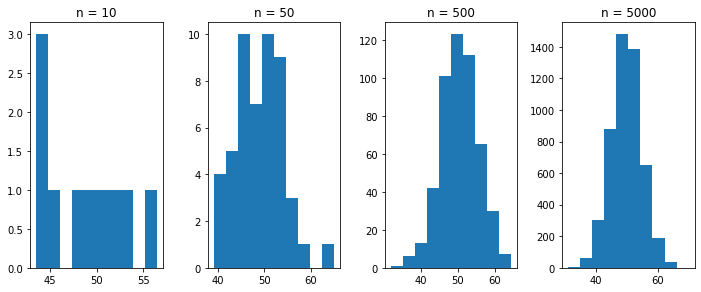

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(10,4))
fig.tight_layout()
for i in range(len(n)):
    ax[i].hist(n[i])
    ax[i].set_title(f"n = {sample_size[i]}")

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

#### *Explain the test results here*

Teorema Central del límite: Con una muestra suficientemente grande, todo se puede aproximar a una normal. La gráfica de 5000 samples sigue una distribución normal, cosa que la de 10 samples no hace.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

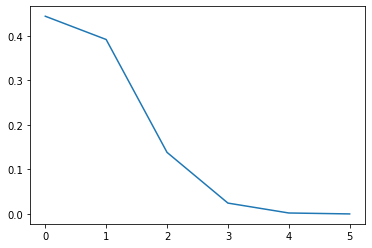

In [16]:
n = 5
p = 0.15
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)
plt.plot(x,y)

In [17]:
print(sum(y)) # La suma de todas las probabilidades es 1

0.9999999999999999


#### *Explain what you observe from the plot above*
La probabilidad de que nadie lo vea es del 45%, de que lo vea una persona es del 40%, que dos personas vean el anuncio es del 0.15 y de que tres personas lo vean es del 3%.

#### Now plot PMP with 50, 500, and 5000 visitors.

In [6]:
n = [50, 500, 500]
p = 0.15

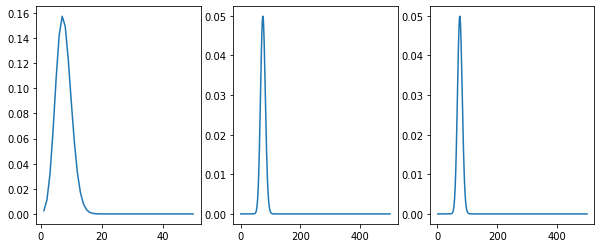

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(10,4))
for i in range(len(n)):
    x = np.arange(1, n[i]+1)
    y = binom.pmf(x, n[i], p)
    ax[i].plot(x,y)

#### What did you notice from the distribution plots? Comment your findings.

Cuanto más elementos tiene la muestra, más estrecha es la curva.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

Poisson muestra la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

*k = numero de ocurrencias del fenómeno

*lambda/mu = numero de veces que se espera que ocurra (300)

In [32]:
k = 320
mu = 300
poisson.pmf(k, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [33]:
k = 60
mu = 300
poisson.pmf(k, mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

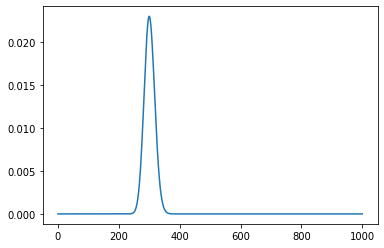

In [29]:
k = 300
x = np.arange(0, 1001)
y = poisson.pmf(k, x)
plt.plot(x,y)

La probabilidad se centra en 300, lo cual tiene sentido.

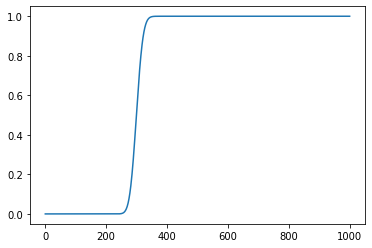

In [30]:
k = 300
x = np.arange(0, 1001)
y = poisson.cdf(x, k)
plt.plot(x,y)